In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [5]:
# this function returns parameters of the best-fit line
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X)

    numer = sum([xi*yi for xi, yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    return a, b

In [6]:
# this function returns pandas dataframe from the TESS spread sheet
def read_tess(sheetName):
    TESS = pd.ExcelFile('TESSRechecks_ALLDATA.xlsx')
    sheet = pd.read_excel(TESS, sheetName)
    sheet = sheet[['Object Type',
                   'WISEID',
                   'W1-W4',
                   '[Ha]',
                   'Amplitude mmags',
                   'Overall assessment: PV, QPV, IV, LAQV, LAIV, NV']]
    sheet = sheet.rename(columns={'Object Type': 'Type',
                                  'W1-W4': 'Excess',
                                  '[Ha]': 'Emission',
                                  'Amplitude mmags': 'Amplitude',
                                  'Overall assessment: PV, QPV, IV, LAQV, LAIV, NV': 'Assessment'})
    return sheet

In [7]:
# obtain the dataframes by reading from specific sheets
YSO = read_tess('YSOE+YSOM').dropna()
YSO = YSO[(YSO.Assessment != 'NV') & (YSO.Assessment != 'LAIV')]
Herbig = read_tess('HerbigAeBe+CBe').dropna()
Herbig = Herbig[(Herbig.Assessment != 'NV') & (Herbig.Assessment != 'LAIV')]
# combine the two types of targets
combined = pd.concat([YSO, Herbig])

Spearmans Correlation Coefficient for YSOE+YSOM: -0.16.
Spearmans Correlation Coefficient for HerbigAeBe+CBe: 0.39.


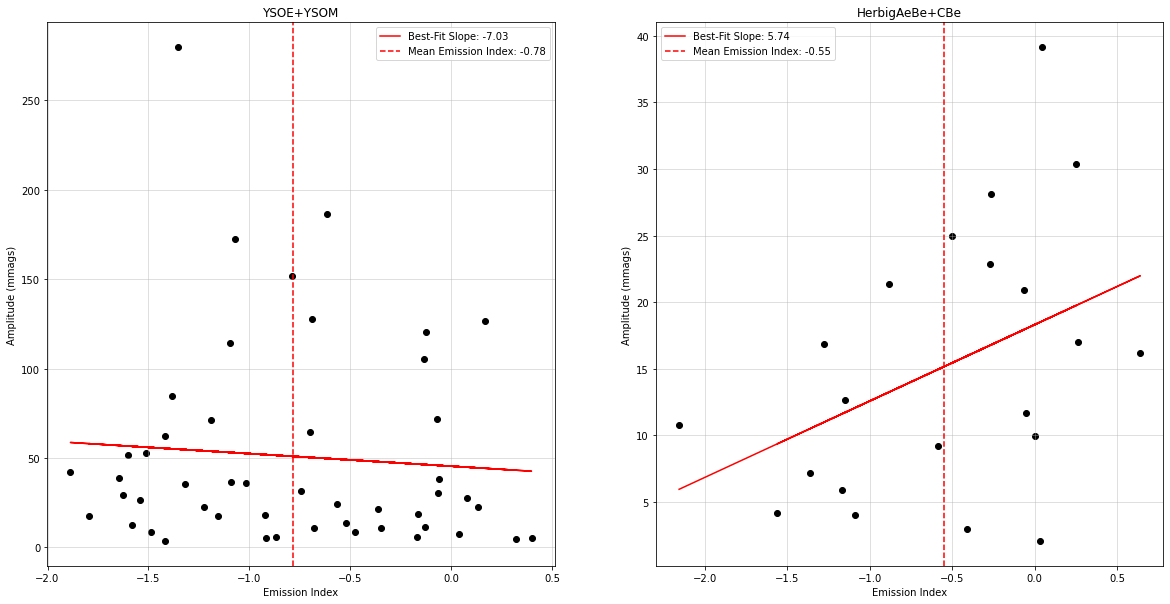

In [5]:
# divide the data frame into four groups of targets
group = [YSO, Herbig]
groupName = ['YSOE+YSOM', 'HerbigAeBe+CBe']

# create figures based on target types
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)
for i in range(2):
    # set emission to be x-axis and variability to be y-axis
    x = group[i].Emission
    y = group[i].Amplitude
    # generate the scatter plot
    ax[i].scatter(x, y, color='black')

    # draw the best-fit line on the figures
    a, b = best_fit(x, y)
    yfit = [a + b * xi for xi in x]
    ax[i].plot(x, yfit, color='red',
               label=f"Best-Fit Slope: {b:.2f}")
    # calculate and show the average emission index
    ax[i].axvline(x=np.average(x), color='r', linestyle='--',
                  label=f"Mean Emission Index: {np.average(x):.2f}")

    # calculate the correlation coefficient with Spearman's Rank method
    coef, p = spearmanr(x.astype(float), y.astype(float))
    print(f"Spearmans Correlation Coefficient for {groupName[i]}: {coef:.2f}.")
    ax[i].set(xlabel='Emission Index', ylabel='Amplitude (mmags)',
              title=groupName[i])
    ax[i].grid(alpha=0.5)
    ax[i].legend()

plt.savefig('bulk comparison.png')
plt.show()

Spearmans Correlation Coefficient for YSO: -0.16.


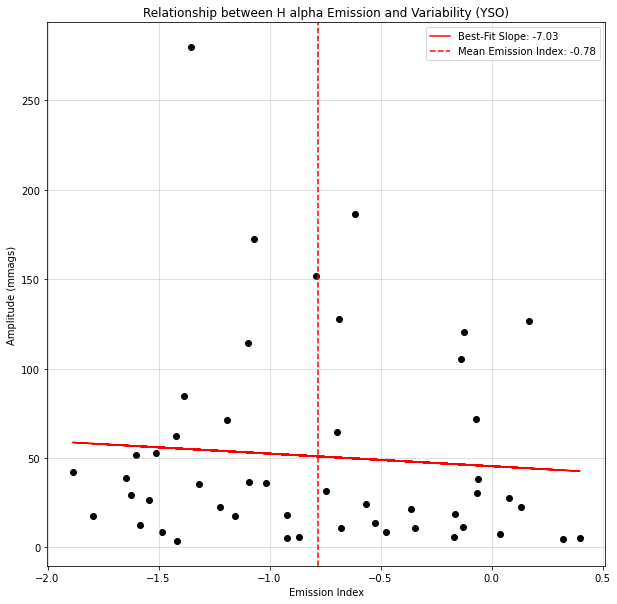

In [12]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
# set emission to be x-axis and variability to be y-axis
x = YSO.Emission
y = YSO.Amplitude
# generate the scatter plot
ax.scatter(x, y, color='black')

# draw the best-fit line on the figures
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
ax.plot(x, yfit, color='red',
        label=f"Best-Fit Slope: {b:.2f}")
# calculate and show the average emission index
ax.axvline(x=np.average(x), color='r', linestyle='--',
           label=f"Mean Emission Index: {np.average(x):.2f}")

# calculate the correlation coefficient with Spearman's Rank method
coef, p = spearmanr(x.astype(float), y.astype(float))
print(f"Spearmans Correlation Coefficient for YSO: {coef:.2f}.")
ax.set(xlabel='Emission Index', ylabel='Amplitude (mmags)',
       title="Relationship between H alpha Emission and Variability (YSO)")
ax.grid(alpha=0.5)
ax.legend()

plt.savefig('YSOEmission.png')
plt.show()

Spearmans Correlation Coefficient: -0.15.


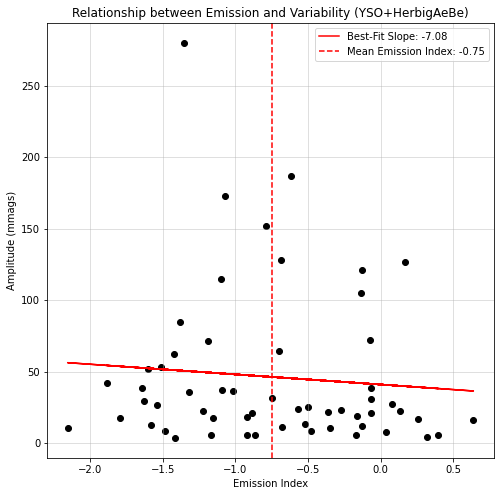

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 8)

x = combined[combined["Type"] != 'CBE'].Emission
y = combined[combined["Type"] != 'CBE'].Amplitude
ax.scatter(x, y, color='black')

a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
ax.plot(x, yfit, color='red',
        label=f"Best-Fit Slope: {b:.2f}")
ax.axvline(x=np.average(x), color='r', linestyle='--',
           label=f"Mean Emission Index: {np.average(x):.2f}")

coef, p = spearmanr(x.astype(float), y.astype(float))
print(f"Spearmans Correlation Coefficient: {coef:.2f}.")
ax.set(xlabel='Emission Index', ylabel='Amplitude (mmags)',
       title='Relationship between Emission and Variability (YSO+HerbigAeBe)')
ax.grid(alpha=0.5)
ax.legend()

plt.savefig('all targets.png')
plt.show()

Spearmans Correlation Coefficient: -0.09.


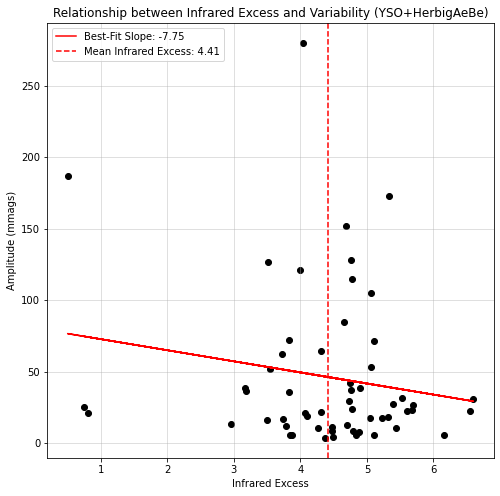

In [7]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 8)

x = combined[combined["Type"] != 'CBE'].Excess
y = combined[combined["Type"] != 'CBE'].Amplitude
ax.scatter(x, y, color='black')

a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
ax.plot(x, yfit, color='red',
        label=f"Best-Fit Slope: {b:.2f}")

coef, p = spearmanr(x.astype(float), y.astype(float))
print(f"Spearmans Correlation Coefficient: {coef:.2f}.")
ax.set(xlabel='Infrared Excess', ylabel='Amplitude (mmags)',
       title='Relationship between Infrared Excess and Variability (YSO+HerbigAeBe)')
ax.grid(alpha=0.5)
ax.legend()

plt.savefig('all targets.png')
plt.show()

In [13]:
TESS = pd.ExcelFile('TESSRechecks_ALLDATA.xlsx')

sheet = pd.read_excel(TESS, 'YSOE+YSOM')
sheet = sheet[['WISEID',
               'W1-W4',
               'Amplitude mmags',
               'Overall assessment: PV, QPV, IV, LAQV, LAIV, NV']]
sheet = sheet.rename(columns={'W1-W4': 'Excess',
                              'Amplitude mmags': 'Amplitude',
                              'Overall assessment: PV, QPV, IV, LAQV, LAIV, NV': 'Assessment'})

YSO = sheet.dropna()
YSO = YSO[(YSO.Assessment != 'NV') & (YSO.Assessment != 'LAIV')]

In [14]:
TESS = pd.ExcelFile('TESSRechecks_ALLDATA.xlsx')

sheet = pd.read_excel(TESS, 'DebrisDisk')
sheet = sheet[['WISEID',
               'W1-W4',
               'Amplitude mmags',
               'Overall assessment: PV, QPV, IV, LAQV, LAIV, NV']]
sheet = sheet.rename(columns={'W1-W4': 'Excess',
                              'Amplitude mmags': 'Amplitude',
                              'Overall assessment: PV, QPV, IV, LAQV, LAIV, NV': 'Assessment'})

DD = sheet.dropna()
DD = DD[(DD.Assessment != 'NV') & (DD.Assessment != 'LAIV')]

In [15]:
sheet = pd.read_excel(TESS, 'ExtremeDebrisDisk')
sheet = sheet[['WISEID',
               'W1-W4',
               'Amplitude mmags',
               'Overall assessment: PV, QPV, IV, LAQV, LAIV, NV']]
sheet = sheet.rename(columns={'W1-W4': 'Excess',
                              'Amplitude mmags': 'Amplitude',
                              'Overall assessment: PV, QPV, IV, LAQV, LAIV, NV': 'Assessment'})

EDD = sheet.dropna()
EDD = EDD[(EDD.Assessment != 'NV') & (EDD.Assessment != 'LAIV')]

Spearmans Correlation Coefficient: 0.27.


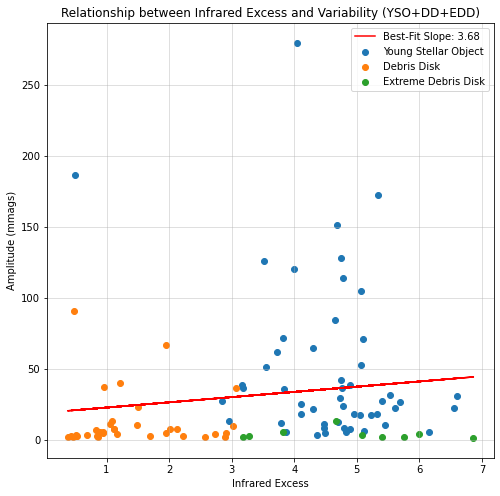

In [22]:
combined = pd.concat([YSO, DD, EDD])

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 8)

x = combined.Excess
y = combined.Amplitude

ax.scatter(YSO.Excess, YSO.Amplitude, label='Young Stellar Object')
ax.scatter(DD.Excess, DD.Amplitude, label='Debris Disk')
ax.scatter(EDD.Excess, EDD.Amplitude, label='Extreme Debris Disk')

a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
ax.plot(x, yfit, color='red',
        label=f"Best-Fit Slope: {b:.2f}")

coef, p = spearmanr(x.astype(float), y.astype(float))
print(f"Spearmans Correlation Coefficient: {coef:.2f}.")
ax.set(xlabel='Infrared Excess', ylabel='Amplitude (mmags)',
       title='Relationship between Infrared Excess and Variability (YSO+DD+EDD)')
ax.grid(alpha=0.5)
ax.legend()

plt.savefig('AllInfrared.png')
plt.show()

Spearmans Correlation Coefficient: -0.06.


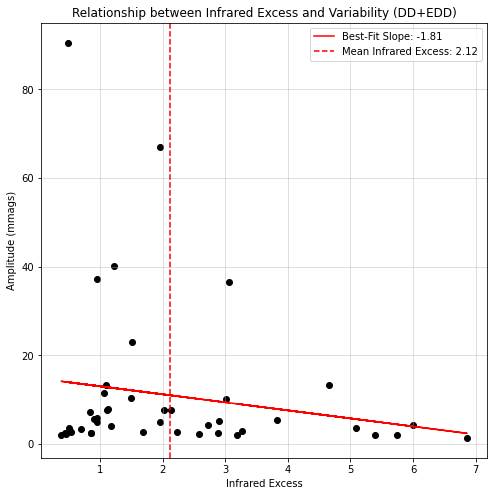

In [33]:
combined = pd.concat([DD, EDD])

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 8)

x = combined.Excess
y = combined.Amplitude
ax.scatter(x, y, color='black')

a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
ax.plot(x, yfit, color='red',
        label=f"Best-Fit Slope: {b:.2f}")

coef, p = spearmanr(x.astype(float), y.astype(float))
print(f"Spearmans Correlation Coefficient: {coef:.2f}.")
ax.set(xlabel='Infrared Excess', ylabel='Amplitude (mmags)',
       title='Relationship between Infrared Excess and Variability (DD+EDD)')
ax.grid(alpha=0.5)
ax.legend()

plt.savefig('all targets.png')
plt.show()